#### Examples of use of data on the emerging active regions

Open the `ear.h5` file from the disk:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import HTML
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

ear_path = '../ear.h5'

# tables with database description
d_t0 = pd.read_hdf(ear_path, key='beginning', mode='r')
d_t1 = pd.read_hdf(ear_path, key='first_hours', mode='r')
d_t2 = pd.read_hdf(ear_path, key='maximum', mode='r')

# database in tabular form
dat = pd.read_hdf(ear_path, 'ear', mode='r')

##### Time-latitude diagram with total unsigned magnetic fluxes of active regions

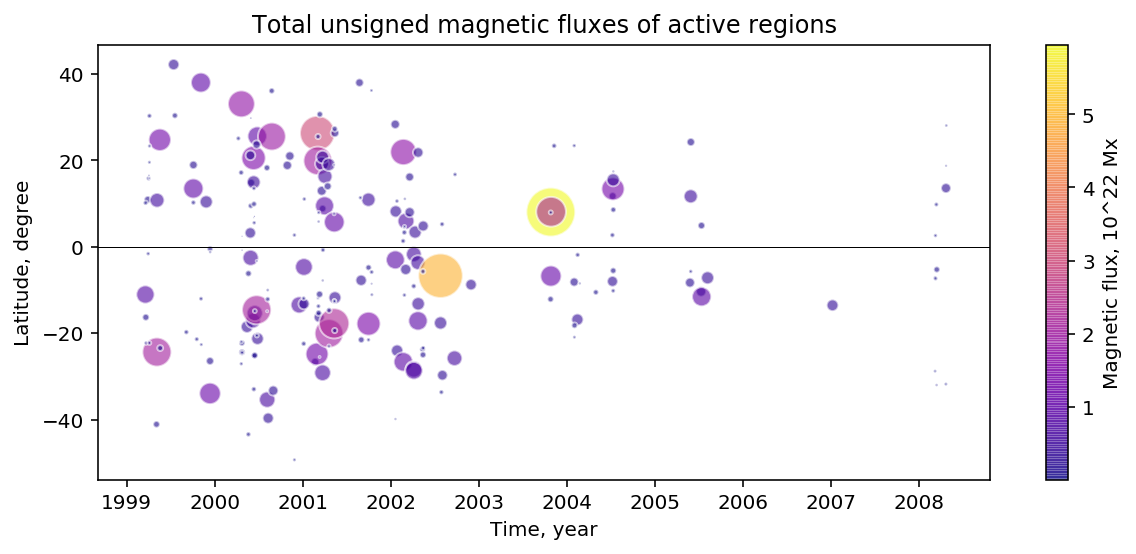

In [2]:
fig, ax = plt.subplots()
ax = dat.plot.scatter(x='time_0',
                       y='lat_0',
                       s=(dat['f_2']-dat['f_0'])/1e20,
                       c=(dat['f_2']-dat['f_0'])/1e22, colormap='plasma',
                       edgecolors='white', alpha=0.6,
                       figsize=(10, 4), ax=ax)

plt.axhline(y=0.0, color='black', linestyle='-', linewidth = .5)
l1=ax.set_xlabel('Time, year')
l2=ax.set_ylabel('Latitude, degree')
re=plt.title('Total unsigned magnetic fluxes of active regions')
f = plt.gcf()
cax = f.get_axes()[1]
ct=cax.set_ylabel('Magnetic flux, 10^22 Mx')

##### Time-latitude diagram with the areas of sunspots in active regions

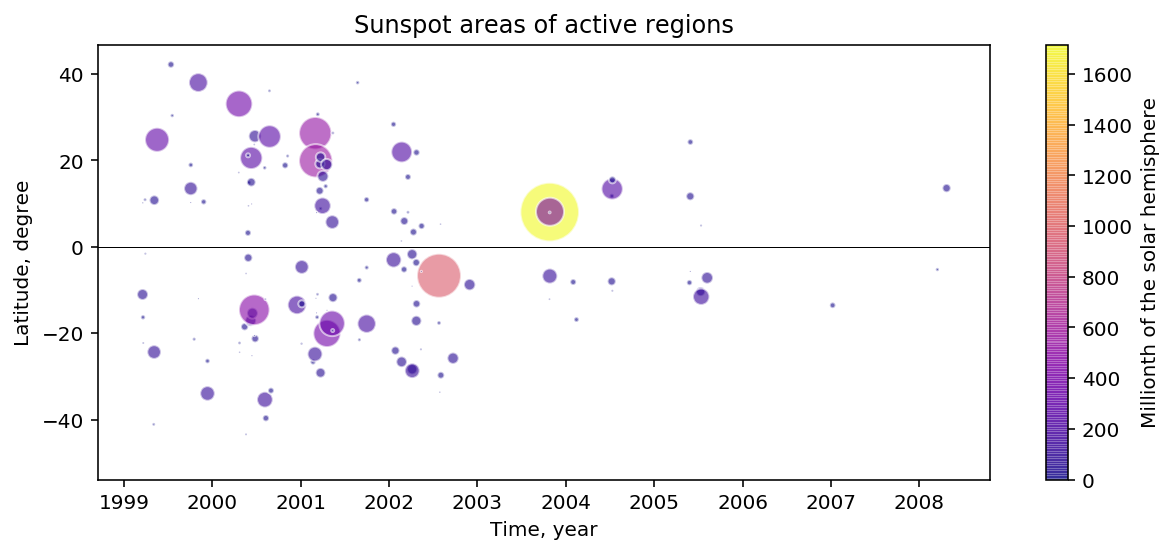

In [3]:
fig, ax = plt.subplots()
ax = dat.plot.scatter(x='time_0',
                      y='lat_0',
                      s=dat['s_a_2']/2,
                      c=dat['s_a_2'], colormap='plasma',
                      edgecolors='white', alpha=0.6,
                      figsize=(10, 4), ax=ax)

plt.axhline(y=0.0, color='black', linestyle='-', linewidth = .5)
l1=ax.set_xlabel('Time, year')
l2=ax.set_ylabel('Latitude, degree')
re=plt.title('Sunspot areas of active regions')
f = plt.gcf()
cax = f.get_axes()[1]
ct=cax.set_ylabel('Millionth of the solar hemisphere')

##### Histogram of the number of sunspots in active regions

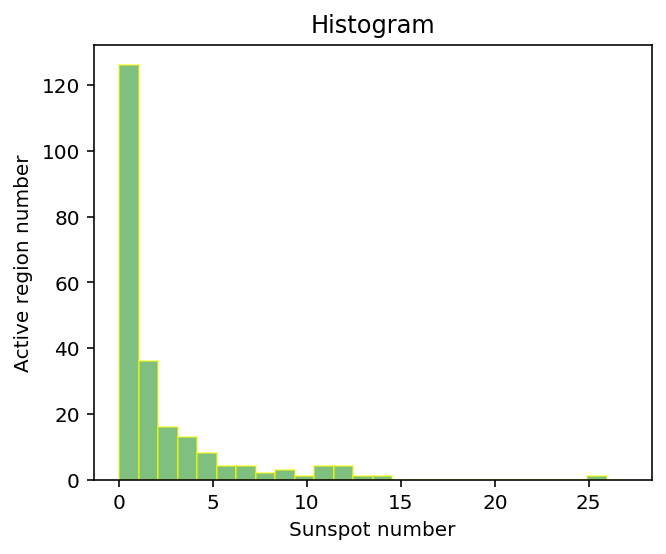

In [4]:
df = dat['s_n_2']
HIST_BINS = np.linspace(0, 27, 27)
n, _ = np.histogram(df, HIST_BINS)

fig, ax = plt.subplots(figsize=(5, 4))
_, _, bar_container = ax.hist(df, HIST_BINS, lw=1,
                              ec='yellow',
                              fc='green',
                              alpha=0.5)

l1=ax.set_xlabel('Sunspot number')
l2=ax.set_ylabel('Active region number')
re=plt.title('Histogram')

##### Relationship between the magnetic flux growth rate and the maximum magnetic field strength <br> (active regions emerging in the central part of the solar disk with $\theta $ <25º)

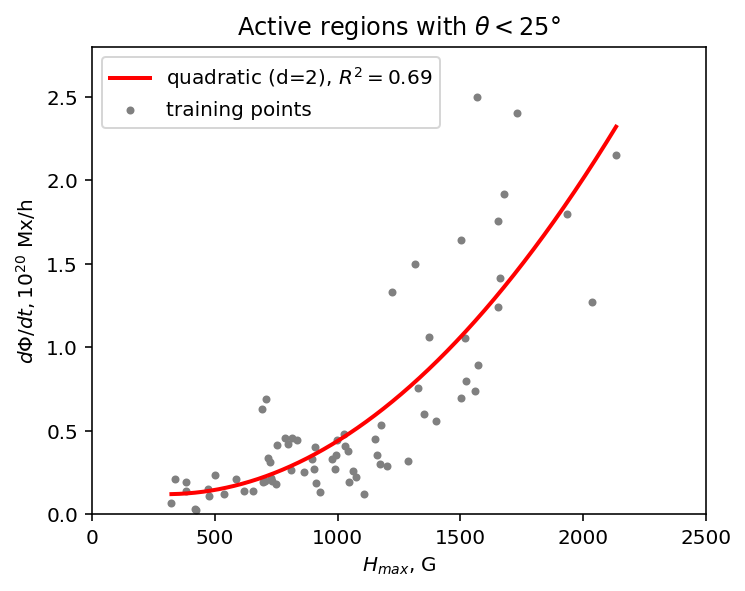

In [5]:
ind = (np.where((dat['th_0'] < 25)))[0]

X = (dat[['hmax_1']].values)[ind]
y = (dat['f_rate_1'].values)[ind]/1e20

regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

fig, ax = plt.subplots(figsize=(5.5, 4.3))
plt.scatter(X, y, label='training points', color='gray', marker='.')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2), color='red', lw=2, linestyle='-')
plt.xlabel('$H_{max}$, G')
plt.ylabel('$d\Phi/dt, 10^{20}$ Mx/h')
plt.title(r'Active regions with $\theta<25\degree$')
plt.xlim(0, 2500)
plt.ylim(0, 2.8)
plt.legend(loc='upper left')

##### Relationship of the maximum negative Doppler velocity with the heliocentric angle <br> at the beginning of formation of active regions

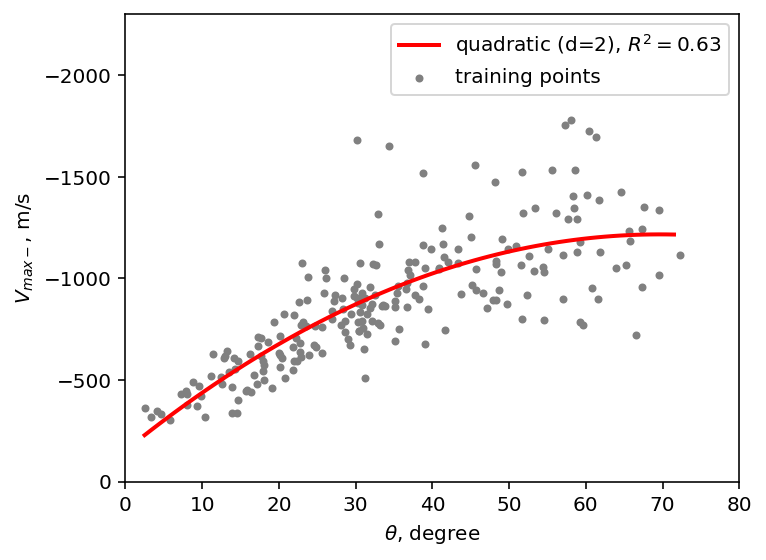

In [6]:
X = dat[['th_vmin_1']].values
y = dat['vmin_1'].values

regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

fig, ax = plt.subplots(figsize=(5.5, 4.3))
plt.scatter(X, y, label='training points', color='gray', marker='.')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2), color='red', lw=2, linestyle='-')
plt.xlabel(r'$\theta$, degree')
plt.ylabel('$V_{max-}$, m/s')
plt.xlim(0, 80)
plt.ylim(0, -2300)
plt.legend(loc='upper right')